# Trabajo Practico Final

## Alumnos

|Apellido | Nombres  |  Padron |
|:-------:|:--------:|:-------:|
|  Blanco |  Sebastian Ezequiel | 98539  |
|  Llauro | Manuel Luis  |  95736 |
|  Rial | Sebastian Andres  | 90309  |

In [18]:
import pandas as pd

In [131]:
#----------------------------------------------------------------
# GET DATA FRAME
#----------------------------------------------------------------
def get_data_frame(path, a_sep):
    return pd.read_csv(path, low_memory=False, sep=a_sep)
#----------------------------------------------------------------
# GET JSON
#----------------------------------------------------------------
def get_json(path):
    return pd.read_json(path)
#----------------------------------------------------------------
# GET CATEGORIES CONVERTION
#----------------------------------------------------------------
def get_categories_convertion(json):
    size = len(json)
    categories = {}
    for i in range(0, size):
        _id = int(json['items'][i]['id'])
        value = str(json['items'][i]['snippet']['title'])
        categories[_id] = value
    return categories
#----------------------------------------------------------------
# ADD CATEGORIES
#----------------------------------------------------------------
def add_categories(videos, categories_dict):
    categories = []
    size = len(videos)
    for i in range(0, size):
        categories.append(categories_dict[videos['category_id'][i]])
    videos['categories'] = categories
    return videos

In [132]:
videos = get_data_frame("./data/USvideos.csv", ',')
json = get_json("./data/US_category_id.json")
categories_dict = get_categories_convertion(json)
videos = add_categories(videos, categories_dict)

# Recolectar los Datos Iniciales
Los datos utilizados durante el transcurso del proyecto fueron obtenidos gratuitamente
en el sitio de Kaggle y el mismo se encuentra en formato csv.

## Reporte de Descripción de los Datos
* El data set se enunetra en la carpeta ```src/doc/``` del proyecto. 
* se uso pandas como metodo de recoleccion de datos.
* Para poder levantar el set de datos se usa como separado una coma.

In [133]:
videos.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,categories
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy


# Descubrir datos

## Reporte de descripción de datos

In [134]:
videos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
categories                object
dtype: object

# Exploración de los Datos

## Reporte de Exploración de datos

### Analisis de categorias

Text(0.5,1,u'Genres count')

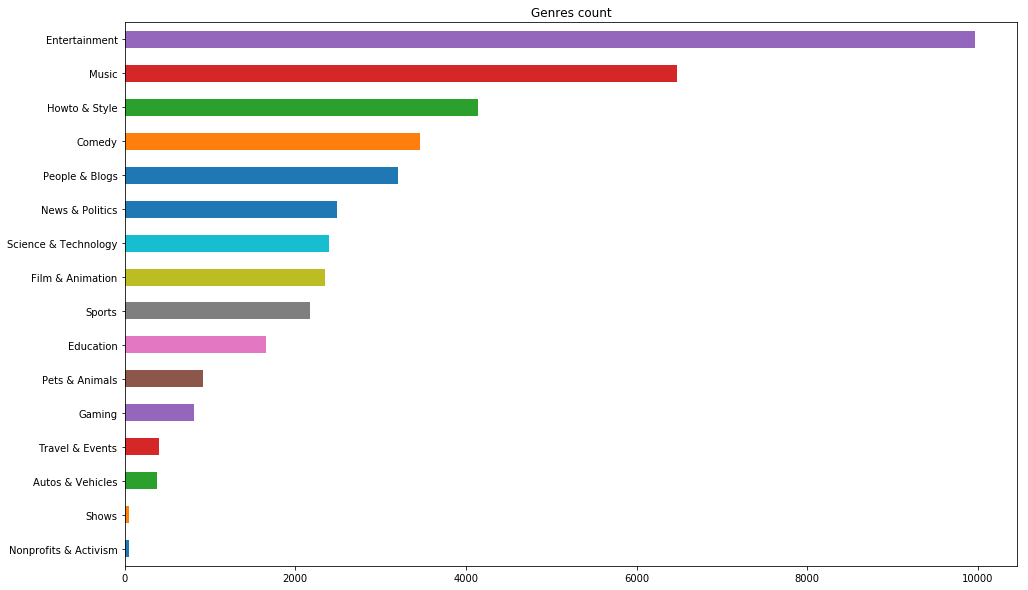

In [136]:
videos.categories.value_counts(ascending=True).plot(kind='barh', figsize=(16,10)).set_title('Genres count')

### Analisis de categorias excluyendo la categoria Entertainment

Text(0.5,1,u'Genres excluding Entertainment')

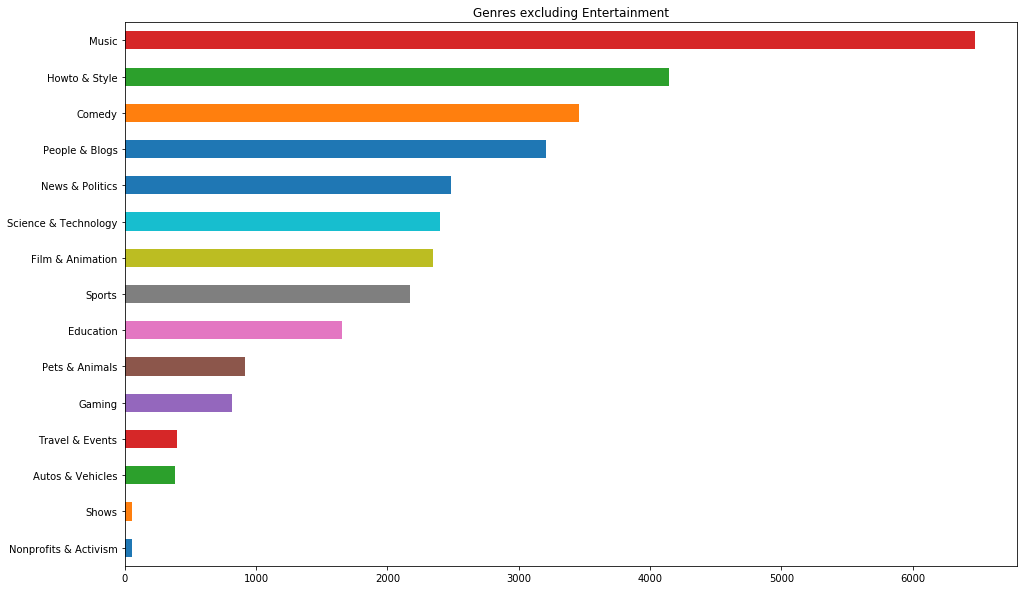

In [141]:
videos[videos['categories'] != 'Entertainment'].categories.value_counts(ascending=True).plot(kind='barh', figsize=(16,10)).set_title('Genres excluding Entertainment')

# Verificar la Calidad de los Datos

## Reporte de Calidad de Datos

In [27]:
# aca explicmos si salio bine o no. si hay coherencia